## Assignment 11 - Matplotlib visualization
### ACD MDS Mar 2018 batch - Student: K. Anandaranga

In [1]:
# Read data from URL: https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#Charts to plot:
#1. Create a pie chart presenting the male/female proportion
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic.info() # shows that there are zero null values for "sex"...so, don't have to worry about data cleaning for this column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


sex
female    466
male      843
Name: name, dtype: int64


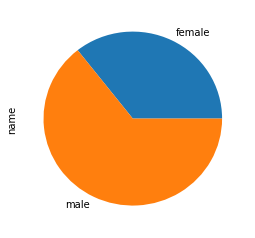

In [6]:
grp_name = titanic.groupby(["sex"])['name'].count()
print (grp_name)
grp_name.plot.pie(figsize=(4, 4))

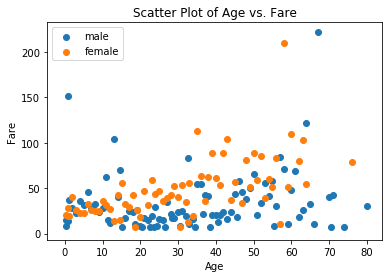

In [7]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

grp = titanic.groupby(["age", "sex"])
grp_unstack = grp.mean()['fare'].unstack()
#grp_unstack.head()

d1 = grp_unstack.male.values  # Mean Fare for all Male passengers by age
d2 = grp_unstack.female.values # Mean Fare for all Female passengers by age
d3 = grp_unstack.index.values  # Age

plt.scatter(d3, d1, label='male')
plt.scatter (d3,d2, label='female')

plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()